In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import re

In [2]:
ds = pd.read_csv('Bengaluru_House_Data.csv')
ds.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
ds.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft               2100 - 2850
bath                             4.0
balcony                          0.0
price                          186.0
Name: 30, dtype: object

In [4]:
ds.shape

(13320, 9)

In [5]:
ds.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
ds.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df = ds.drop(['availability' ,'balcony' , 'society'] , axis = 1) 
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

<Axes: >

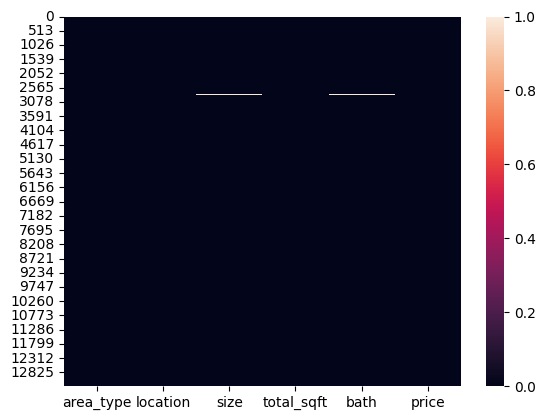

In [9]:
sns.heatmap(df.isnull())

In [10]:
df = df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<Axes: >

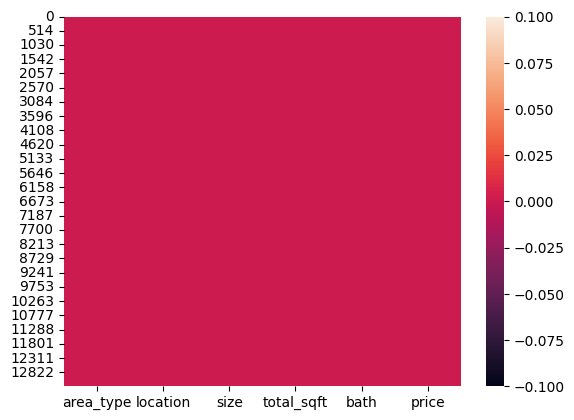

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.shape

(13246, 6)

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['BHK'] = df['size'].apply(lambda x: x.split(' ')[0]).astype(int)
df.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df[df.BHK > 15]

,area_type,location,size,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,Plot Area,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [17]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [19]:
df[df['total_sqft'].apply(is_float)].head()  # Filter rows where 'total_sqft' contains only numeric values


,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
def convert_sqft_to_num(x):
    # Remove any non-numeric characters
    x = re.sub(r'[^\d.-]', '', x)
    
    # Handle ranges with a hyphen
    tokens = x.split('-')
    if len(tokens) == 1:
        try:
            return float(tokens[0])
        except ValueError:
            return None  # Return None if conversion fails
    try:
        return (float(tokens[0]) + float(tokens[1])) / 2
    except ValueError:
        return None  # Return None if conversion fails

In [21]:
convert_sqft_to_num('4155 - 528')

2341.5

In [22]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)
df1.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df1.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
BHK                              4
Name: 30, dtype: object

In [24]:
df1["price_per_sq"] = df1['price']*100000 / df1['total_sqft']
df1.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sq
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df1['location'].unique())

1304

In [26]:
# Convert all values to strings and remove leading/trailing spaces, ignoring NaN values
df1.location = df1.location.fillna('').apply(lambda x: str(x).strip())

location_stats = df1.groupby('location').size().sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Length: 1052, dtype: int64

In [29]:
len(df1['location'].unique())

1293

In [30]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) 
len(df1['location'].unique())

242

In [31]:
df1[df1.total_sqft/df1.BHK<300].head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sq
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


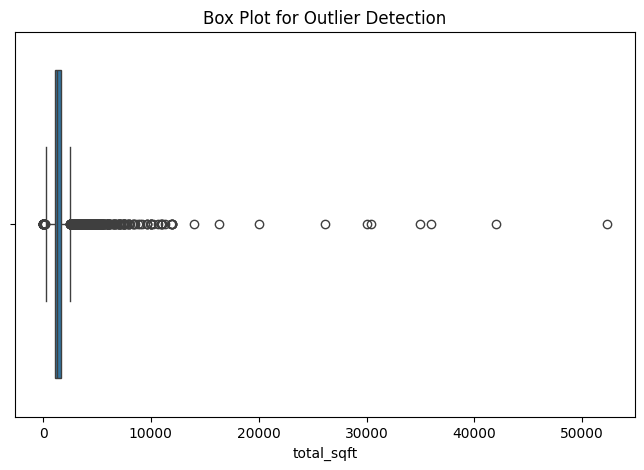

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['total_sqft'])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [33]:
df1=df1[~(df1.total_sqft/df1.BHK<300)]
df1.shape

(12476, 8)

In [34]:
df1.price_per_sq.describe()

count     12464.000000
mean       6308.291737
std        4167.032556
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sq, dtype: float64

In [35]:
import json
file_path = "Banglore House Rent.ipynb"

with open(file_path, "r", encoding="utf-8") as f:
    content = f.read()

# Replace non-breaking spaces with normal spaces
clean_content = content.replace("\u00A0", " ")

with open(file_path, "w", encoding="utf-8") as f:
    f.write(clean_content)

print("Non-breaking spaces removed successfully!")

Non-breaking spaces removed successfully!


In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()    
    for key, subdf in df.groupby("location"):    
        m = np.mean(subdf.price_per_sq)    
        st = np.std(subdf.price_per_sq)    
        reduced_df = subdf[(subdf.price_per_sq > (m - st)) & (subdf.price_per_sq <= (m + st))]    
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)    
    return df_out

# Remove outliers in 'price_per_sqft' based on 1 standard deviation per location
df2 = remove_pps_outliers(df1)
print(df2.shape)

(10247, 8)


In [37]:
df_filtered = df[df['location'].str.startswith('H', na=False)]
print(df_filtered['location'].unique())


['Hebbal' 'HSR Layout' 'Himagiri Meadows' 'Hegde Nagar' 'Haralur Road'
 'Hennur Road' 'Hormavu' 'Hulimavu' 'Hosa Road' 'Hebbal Kempapura'
 'Horamavu Agara' 'Harlur' 'Hennur' 'Hoodi Circle, ' 'Hosur Road' 'Hoodi'
 'Hoysalanagar' 'Herohalli' 'HRBR Layout' 'Hosapalya' 'Hosahalli'
 'Hosakerehalli' 'Huskur' 'HMT Layout' 'HBR Layout' 'Hosakerehalli Layout'
 'Hennagara' 'Horamavu Banaswadi' 'Hallehalli' 'Hessarghatta'
 'Hanumanth Nagar' 'Hunasamaranahalli' 'Hennur Busstop' 'Hiremath Layout'
 'HOSUR MAIN ROAD' 'Hongasandra' 'Harappanahalli' 'Hoskote' 'Hoodi Layout'
 'HAL 3rd Stage' 'Hennur Gardens' 'Howthinarayanappa Garden'
 'HAL 2nd Stage' 'Huttanahalli' 'Hagadur' 'Hanumantha Nagar'
 'Hadosiddapura' 'Hanumagiri' 'Handenahalli' 'Hosahalli Extension'
 'Housing Board Layout Vijay Nagar' 'Hennur Bande' 'Hegganahalli'
 'Hullahalli' 'Harohalli' 'High grounds' 'Harsha Layout'
 'Hommadevanahalli' 'HSR Layout 7th sector, ' 'HAL Layout'
 'HOSUR RMAIN ROAD' 'Hoskote near' 'Haralur Road, ' 'Hal old airp

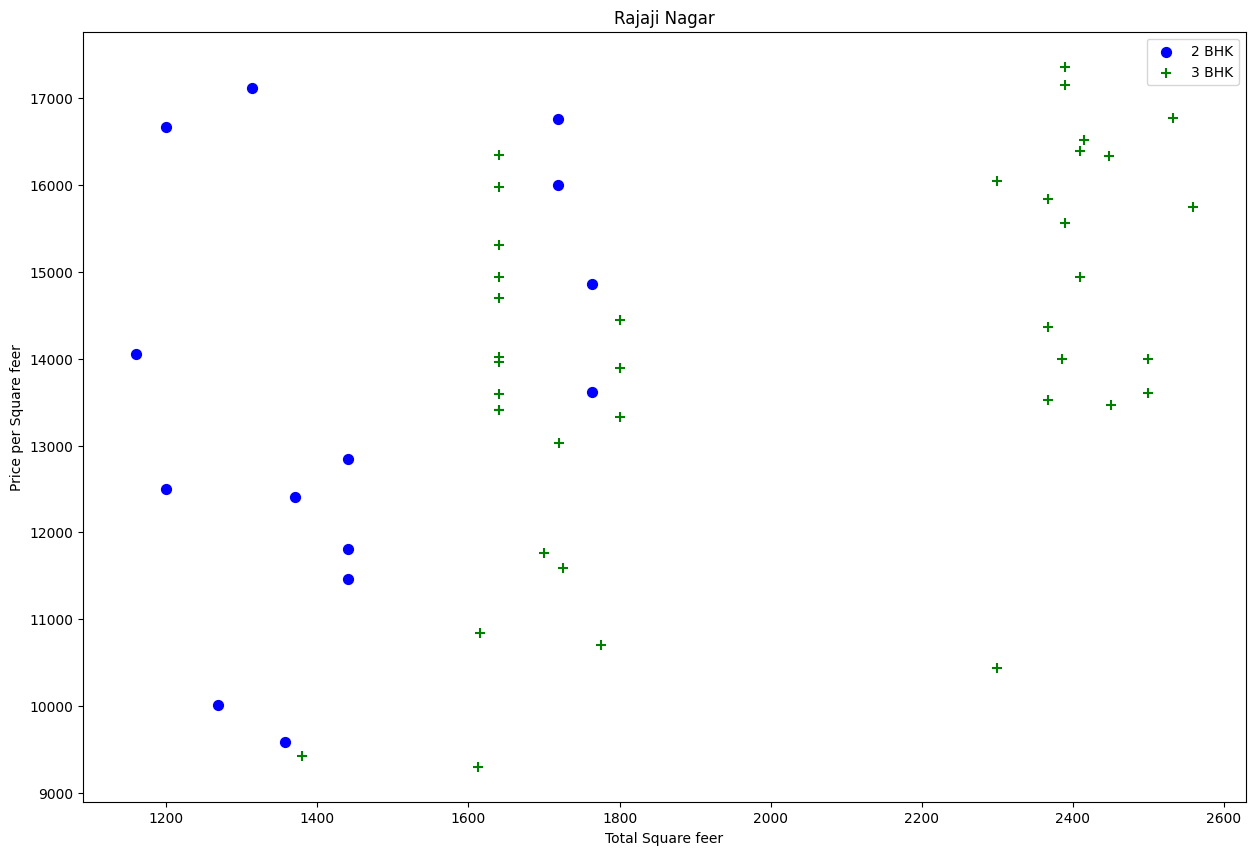

In [38]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location)&(df.BHK==2)]
    BHK3 = df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price_per_sq,color = "blue" , label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price_per_sq,marker = '+' ,color = "green" , label='3 BHK', s=50)
    plt.xlabel("Total Square feer")
    plt.ylabel("Price per Square feer")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df2,"Rajaji Nagar")

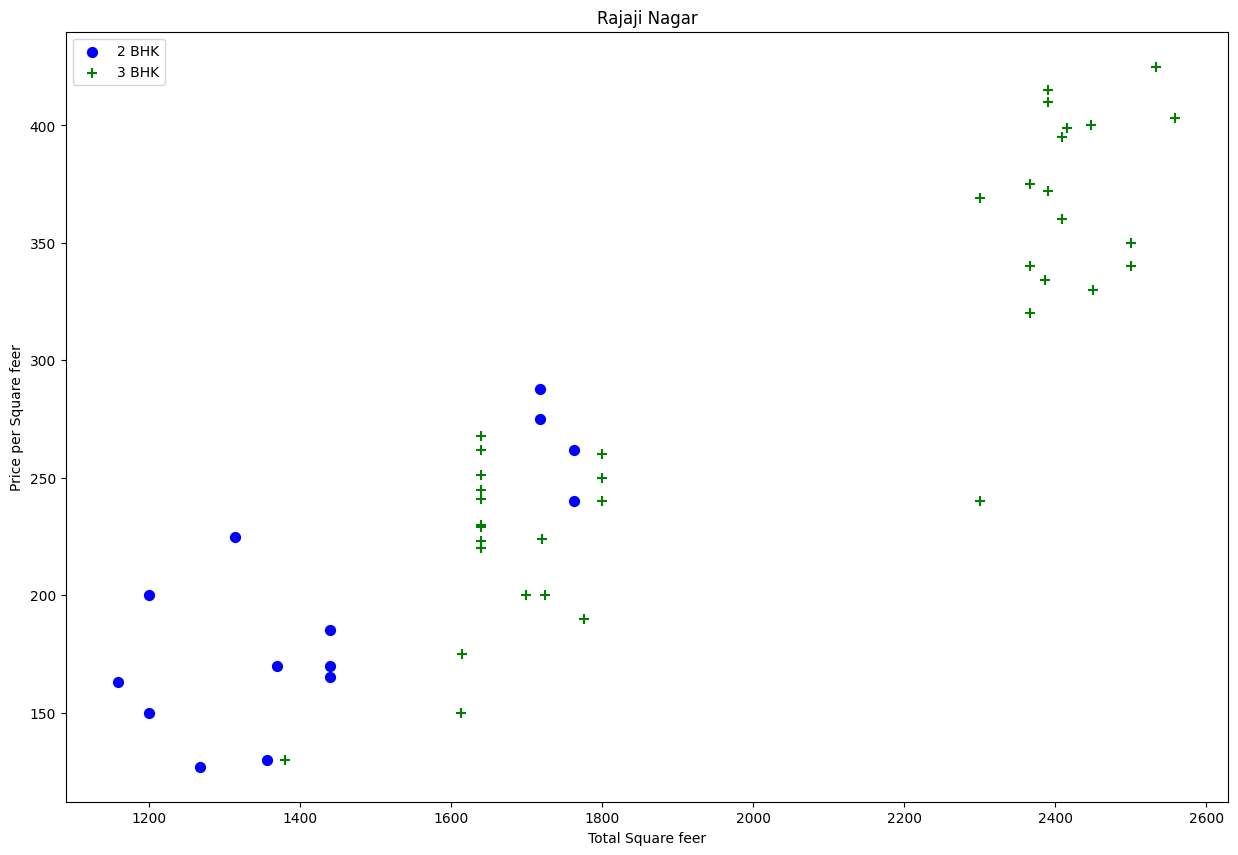

In [39]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location)&(df.BHK==2)]
    BHK3 = df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color = "blue" , label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker = '+' ,color = "green" , label='3 BHK', s=50)
    plt.xlabel("Total Square feer")
    plt.ylabel("Price per Square feer")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df2,"Rajaji Nagar")

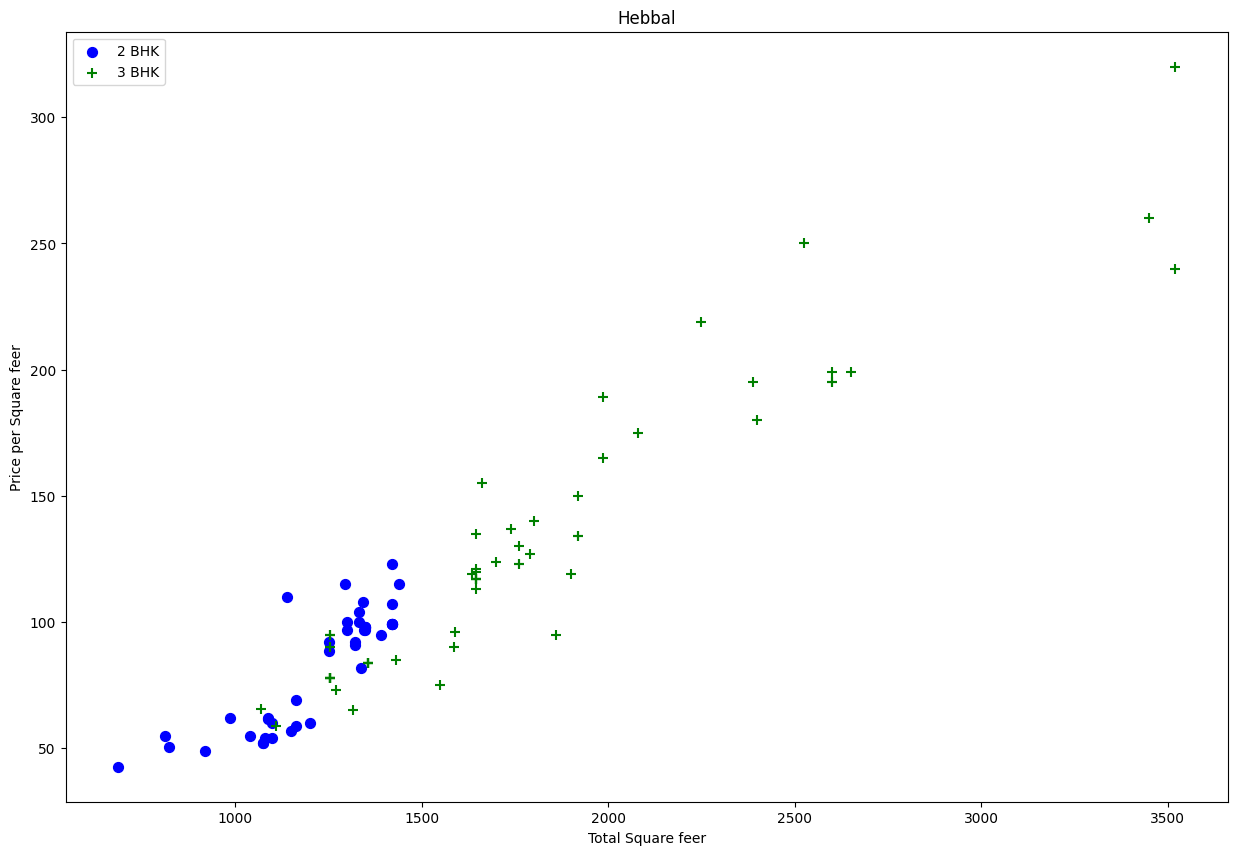

In [40]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location)&(df.BHK==2)]
    BHK3 = df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color = "blue" , label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker = '+' ,color = "green" , label='3 BHK', s=50)
    plt.xlabel("Total Square feer")
    plt.ylabel("Price per Square feer")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df2,"Hebbal")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = []  # Use a list instead of np.array for efficiency

    # Group by location
    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        # Calculate mean and std for each BHK in a specific location
        for BHK, BHK_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(BHK_df['price_per_sq']),
                'std': np.std(BHK_df['price_per_sq']),
                'count': BHK_df.shape[0]
            }

        # Identify outliers: Compare current BHK price_per_sq with (BHK-1) stats
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK - 1)  # Check (BHK-1) if exists
            if stats and stats['count'] > 5:  # Ensure at least 5 samples for comparison
                exclude_indices.extend(
                    BHK_df[BHK_df['price_per_sq'] < stats['mean']].index.tolist()
                )

    # Remove outliers from the DataFrame
    return df.drop(index=set(exclude_indices))  # Convert to set to avoid duplicate indices

df2 = remove_bhk_outliers(df2)
df2.shape

(7327, 8)

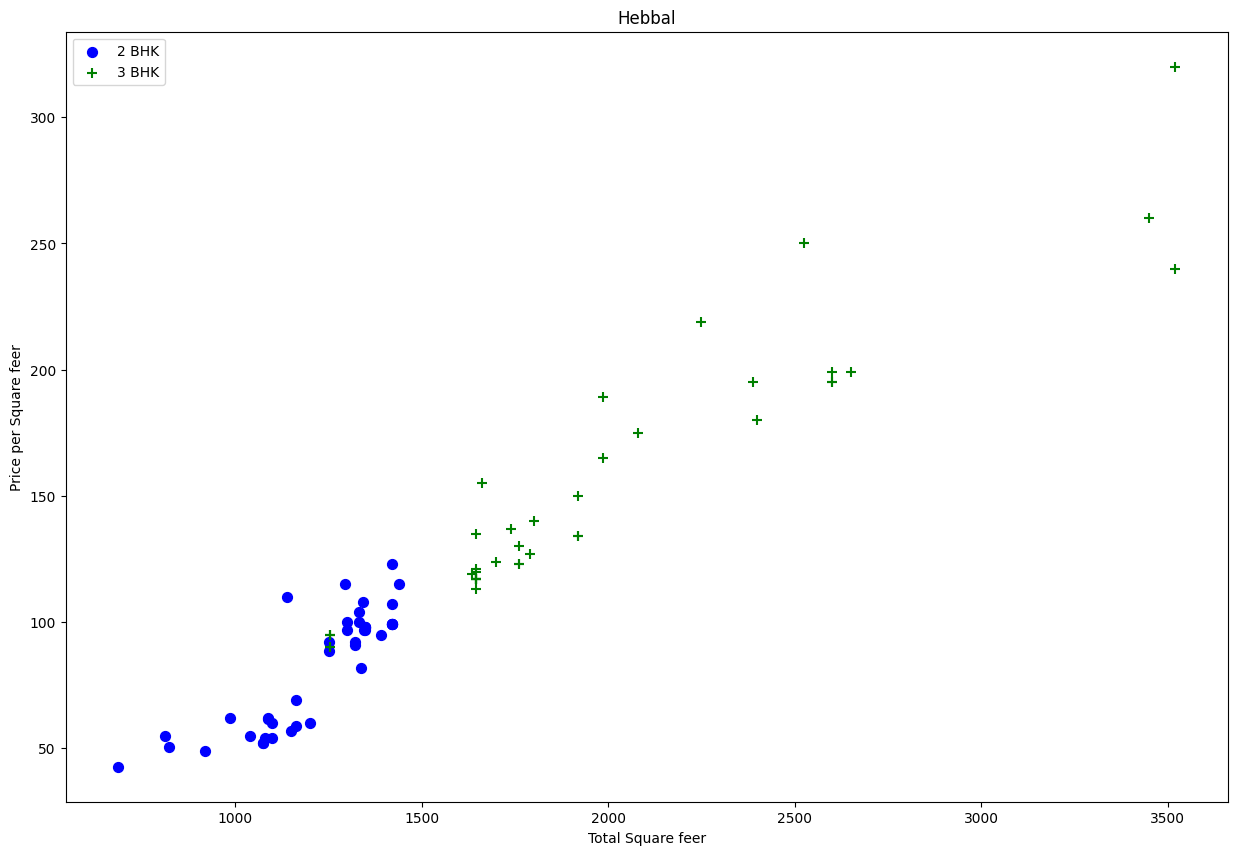

In [42]:
plot_scatter_chart(df2,"Hebbal")

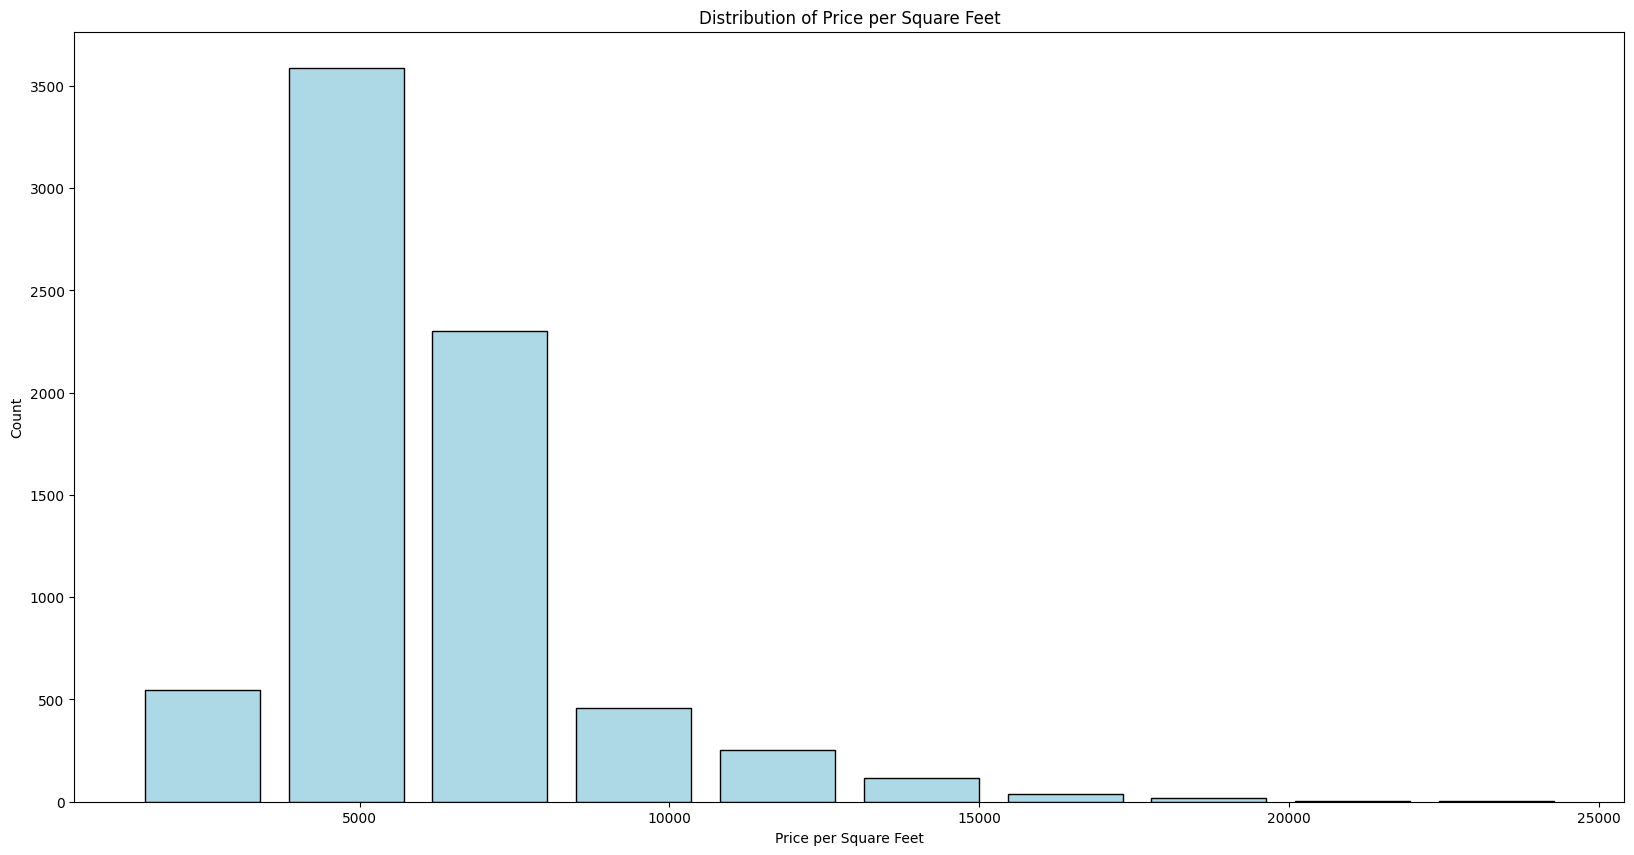

In [43]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
# Plot histogram
plt.hist(df2.price_per_sq, rwidth=0.8, color='lightblue', edgecolor='black')  # Use 'bins' instead of width
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.title("Distribution of Price per Square Feet")
plt.show()

#plot a histogram to shows notmal distibution and also t know the area of mazority of data present int hte data set 

In [44]:
df2.bath.unique()
#here it will shows that that no. of birthroom a hose hold and return only unoique no. of bathroom not for each 

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  9.,  7., 12., 16., 13.])

In [45]:
df2[df2.bath>10]  #return the no. of bathroom greter than 10 and return each rows 

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sq
5279,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8491,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8581,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9314,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9645,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

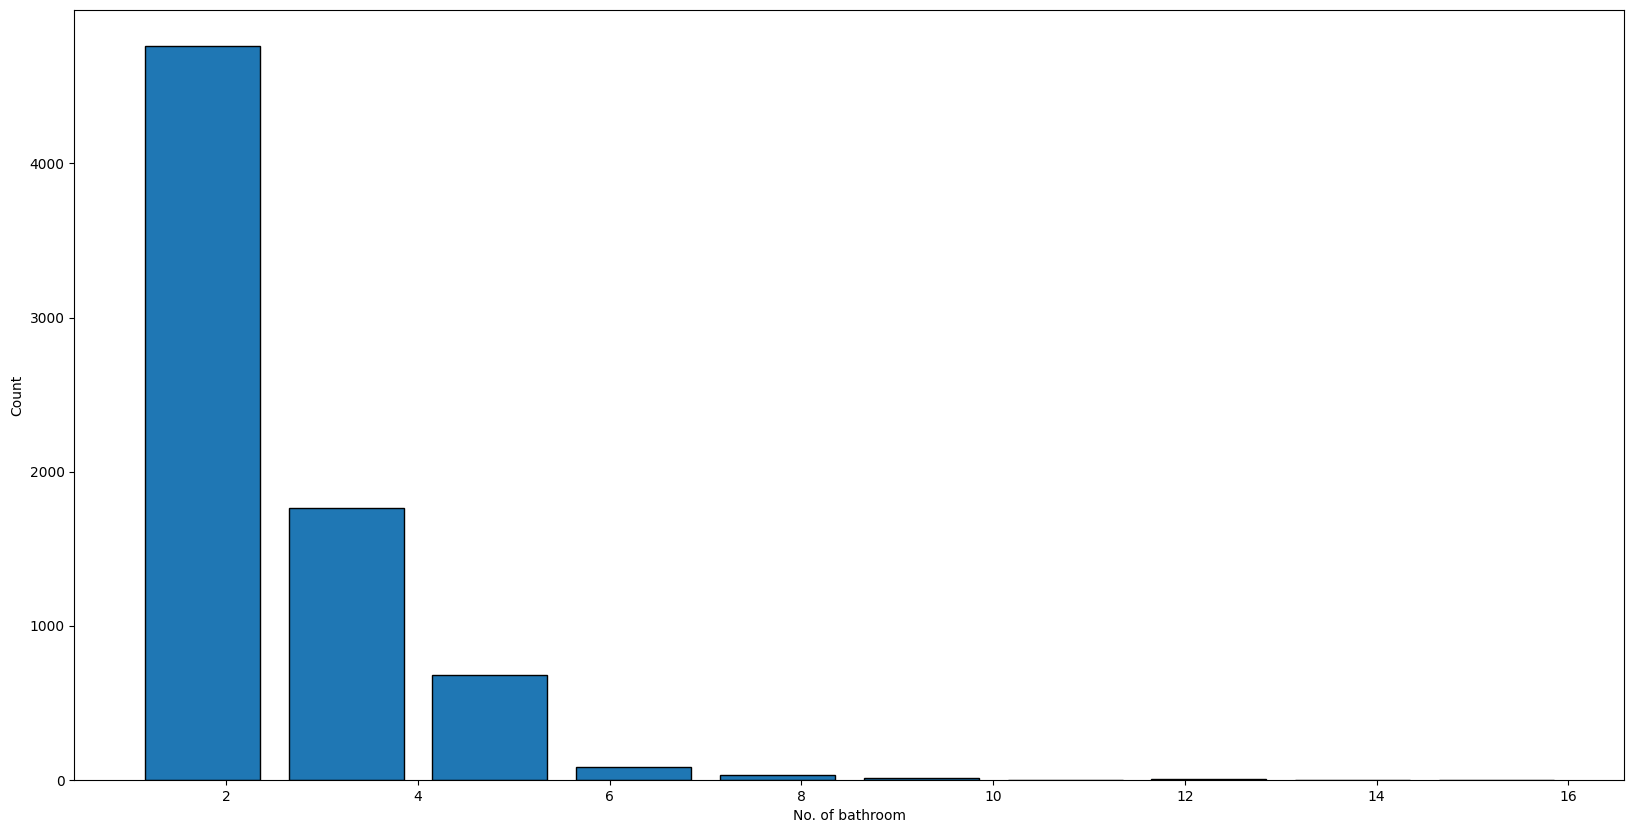

In [46]:
plt.hist(df2.bath, rwidth=0.8,edgecolor='black')  # Use 'bins' instead of width
plt.xlabel("No. of bathroom")
plt.ylabel("Count")

In [47]:
df2[df2.bath > df2.BHK + 2]  
 # This filters the DataFrame df2 where the number of bath (bathrooms) is more than BHK + 2


,area_type,location,size,total_sqft,bath,price,BHK,price_per_sq
1627,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5240,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6713,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8416,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
df2 = df2[df2.bath<df2.BHK+2] 
# here we remove those outlaiers from the data whoch contain more bathroom than no. of BHK + 2
df2.shape

(7249, 8)

In [49]:
df2.drop(['area_type', 'price_per_sq', 'size'], axis=1, inplace=True)
# we drop the columns which are unnessesary for ML model training , here 'area_type', 'price_per_sq' ,'size' these are not required as we have 'price' and 'BHK' column
df2.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### ML model training start also convert categorical data to numeric value

In [50]:
dummies = pd.get_dummies(df2.location).astype(int) #for ML model we want catagorical data to numeric value ,now the categorical values will be converted into 1s and 0s 
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Concatenating the original dataframe (df2) with the dummy variables dataframe (dummies)
# Dropping the 'other' column from dummies before merging, as it may not be needed
df2 = pd.concat([df2, dummies.drop('other', axis=1)], axis=1)

# Displaying the first few rows of the updated dataframe
df2.head()


,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df2.shape

(7249, 246)

In [53]:
df2 = df2.drop('location' , axis = 1)  # We drop location column from the data set because we do not need  for training 
# as we before prepare numeric columns for each location
df2.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x = df2.drop('price',axis = 1)  # here 'x' contain all independent variable because only dependable variable was 'price' column and we removed it 
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = df2.price  #we store the price column in y variable 
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
# Importing the train_test_split function from sklearn (scikit-learn) library
from sklearn.model_selection import train_test_split  # ML method for splitting data

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Variables:
# x -> Independent variables (features) (e.g., square footage, number of rooms, etc.)
# y -> Dependent variable (target/output) (e.g., house price)

# train_test_split() -> ML method that splits data into training and testing sets

# Parameters:
# - x: Features (independent variables) used for prediction
# - y: Target variable (dependent variable) we want to predict
# - test_size=0.2: 20% of the data will be used for testing, 80% for training
# - random_state=10: Ensures reproducibility of results (same split every time)

# Outputs (Variables created after splitting):
# X_train -> Training data for features (80% of x)
# X_test -> Testing data for features (20% of x)
# Y_train -> Training data for target variable (80% of y)
# Y_test -> Testing data for target variable (20% of y)


In [57]:
# Importing the LinearRegression model from sklearn (scikit-learn) library
from sklearn.linear_model import LinearRegression  # ML model

# Creating an instance of the Linear Regression model
lr_clf = LinearRegression()  # Variable (lr_clf) storing the model instance

# Training (fitting) the model using training data (X_train: features, y_train: target)
lr_clf.fit(X_train, Y_train)  # ML method for model training

# Evaluating the model's performance using the test set
lr_clf.score(X_test, Y_test)  # ML method for checking accuracy (R² score)

0.8425655149713909

In [58]:
# Import necessary libraries
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the cross-validation strategy:
# - It will create 5 different train-test splits.
# - 80% of data is used for training, 20% for testing.
# - The random state ensures reproducibility.
# - random_state=0 ensures the splits are the same every time you run the code.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Perform cross-validation:
# - LinearRegression() is our model.
# - 'x' is the feature set, 'y' is the target variable.
# - The function will return 5 different scores (one for each split).
cross_val_score(LinearRegression(), x, y, cv=cv)

# Print the cross-validation scores


array([0.84377644, 0.8519563 , 0.83310272, 0.86189403, 0.86640923])

In [59]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_GridSearchCV(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Removed 'normalize' because it's deprecated
                'fit_intercept': [True, False]
            }},
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }},
        'decision_tree': {  # Fixed duplicate key issue
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated valid values
                'splitter': ['best', 'random']
            }}
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example Usage (Replace X, Y with actual data)
find_best_model_using_GridSearchCV(x, y)


,model,best_score,best_params
0,linear_regression,0.852331,{'fit_intercept': False}
1,lasso,0.702404,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.733619,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [60]:
# This function finds the best model using GridSearchCV by testing different hyperparameters
# It evaluates three models: Linear Regression, Lasso Regression, and Decision Tree Regressor

# 1️⃣ Import necessary libraries
# - GridSearchCV: Used for hyperparameter tuning.
# - ShuffleSplit: Randomly shuffles and splits data multiple times for cross-validation.
# - LinearRegression, Lasso, DecisionTreeRegressor: ML models for regression tasks.
# - pandas: Used for creating a structured DataFrame.

# 2️⃣ Define function 'find_best_model_using_GridSearchCV'
# - Takes input features (X) and target variable (Y).
# - Defines a dictionary containing different models and their hyperparameter options.

# 3️⃣ Define models and their hyperparameters
# - Linear Regression: Tests with and without an intercept.
# - Lasso Regression: Tests different alpha values and selection methods.
# - Decision Tree Regressor: Tests different split criteria and splitters.

# 4️⃣ Set up cross-validation method
# - Uses ShuffleSplit to randomly split data 5 times into 80% training and 20% testing.

# 5️⃣ Perform hyperparameter tuning with GridSearchCV
# - Loops through each model, finds the best parameters using GridSearchCV.
# - Trains models and records the best performing model and hyperparameters.

# 6️⃣ Store results in a DataFrame
# - Returns a table containing the best model, its highest score, and optimal parameters.

# 7️⃣ Example usage:
# - Replace X and Y with actual dataset features and target variables before running the function.


In [61]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [62]:
# np.where(x.columns == '2nd Phase Judicial Layout')[0][0]

In [63]:
def predic_price(location, sqft, bath, BHK):
    # Ensure location exists in dataset
    if location not in x.columns:
        raise ValueError(f"Location '{location}' not found in dataset.")

    # Find the column index for the location
    loc_index = np.where(x.columns == location)[0][0]

    # Create a feature array
    features = np.zeros(len(x.columns))
    
    # Assign values for size, bath, and BHK
    features[0] = sqft
    features[1] = bath
    features[2] = BHK
    
    # One-hot encode the location
    if loc_index >= 0:
        features[loc_index] = 1

    # Convert features array to a DataFrame with column names
    features_df = pd.DataFrame([features], columns=x.columns)

    # Predict price using trained model
    return lr_clf.predict(features_df)[0]



In [64]:
predic_price('1st Phase JP Nagar',1000,2,2)

np.float64(83.34782469253142)

In [65]:
print(predic_price('5th Block Hbr Layout',1000,3,3))

12.872343640907417


In [66]:
print(predic_price('Indira Nagar',1000,3,3))

177.5878144463716


In [67]:
print(predic_price('1st Phase JP Nagar',1000,2,3))  #some times 3BHK cast lower than 2 BHK beacuse of compactness or due to any issue 

81.25016181726139


In [68]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [69]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))